In [1]:
# Unit 4 Homework Assignment: A Whale Off the Port(folio)

In [2]:
# Import libraries and dependancies
import pandas as pd
from pathlib import Path
from functools import reduce
import numpy as np
import numpy_financial as npf
%matplotlib inline

In [90]:
# Create a vairable paths
csvpath_algo = ("resource/algo_returns.csv")
algo_returns_csv = pd.read_csv(csvpath_algo, index_col="Date", infer_datetime_format=True, parse_dates=True).dropna()
algo_returns_csv.sample(1)

,Algo 1,Algo 2
Date,,
2018-04-11,0.008156,0.001202


In [91]:
csvpath_whale = ("resource/whale_returns.csv")
whale_returns_csv = pd.read_csv(csvpath_whale, index_col="Date", infer_datetime_format=True, parse_dates=True).dropna()
whale_returns_csv.sample(1)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-18,0.009603,0.007513,0.009557,0.007854


In [94]:
csvpath_sp_tsx = ("resource/sp_tsx_history.csv")
sp_tsx_history_csv = pd.read_csv(csvpath_sp_tsx, index_col="Date", infer_datetime_format=True, parse_dates=True).dropna()
sp_tsx_history_csv.sample(1)

,Close
Date,
2017-04-11,"$15,727.11"


In [6]:
#remove $ sign from df
colstocheck = sp_tsx_history_csv.columns
sp_tsx_history_csv[colstocheck] = sp_tsx_history_csv[colstocheck].replace({"\$":''}, regex = True).replace({",":''}, regex = True)
sp_tsx_history_csv.info()
sp_tsx_history_csv.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1818 non-null   object
dtypes: object(1)
memory usage: 28.4+ KB


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [7]:
#convert data type which allows for manipulation
sp_tsx_history_csv["Close"] = sp_tsx_history_csv.Close.astype(float)

In [8]:
# Created a shifted column to calculate difference between each data entry in close
sp_tsx_history_csv['shifted_column'] = sp_tsx_history_csv["Close"].shift(1)

# Calculate the difference between each data entry
sp_tsx_history_csv["Difference"] = sp_tsx_history_csv["Close"] - sp_tsx_history_csv["shifted_column"]

#Calculate the percentage change from 'close' (the 'shifted_column' is the correct answer)
sp_tsx_history_csv["S&P TSX"] = sp_tsx_history_csv["Difference"] / sp_tsx_history_csv["shifted_column"]

#drop the unused columns
sp_tsx_history_csv.drop(["shifted_column", "Close", "Difference"], axis=1, inplace=True)

In [9]:
# Merge all the data frames together
# compile the list of dataframes you want to merge
data_frames = [whale_returns_csv, algo_returns_csv, sp_tsx_history_csv]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=["Date"],
                                            how='inner'), data_frames)
df_merged.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [10]:
#Performance Analysis

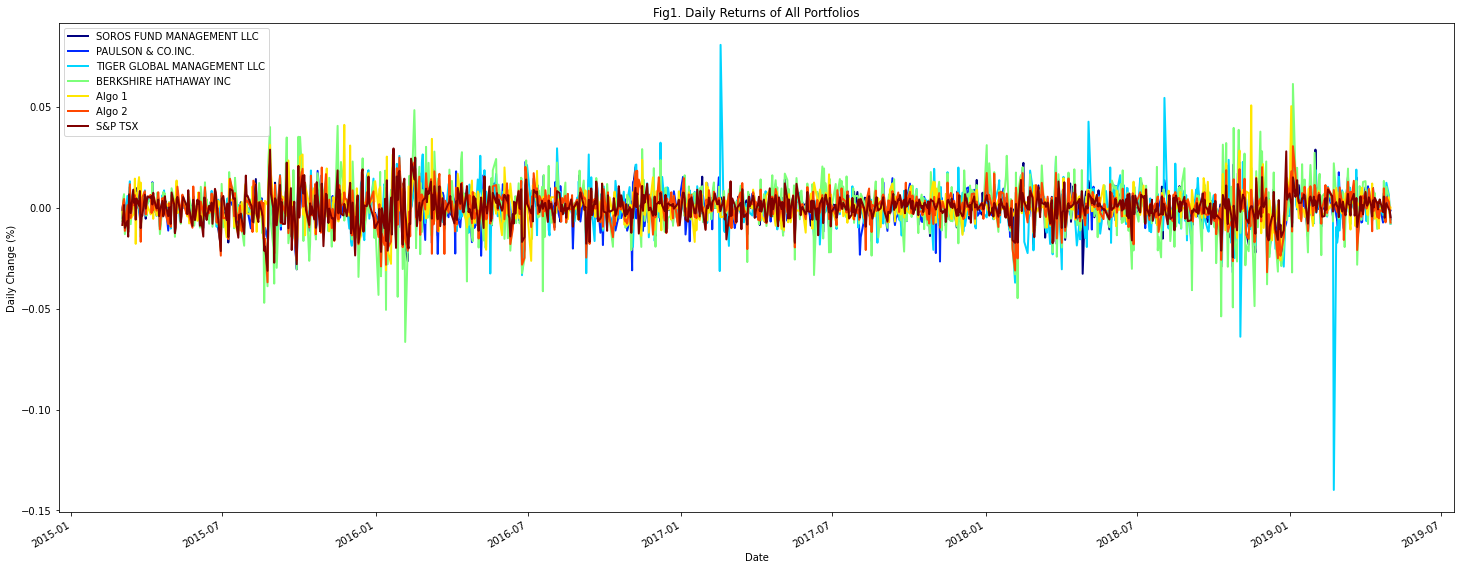

In [11]:
#Calculate and plot daily returns of all portfolios
daily_returns = df_merged
dr = daily_returns.plot(lw=2,figsize=(25,10), colormap="jet", markersize=10, title="Fig1. Daily Returns of All Portfolios", ylabel="Daily Change (%)", xlabel="Date")

<AxesSubplot:title={'center':'Fig2. Daily Cumulative Returns of All Portfolios'}, xlabel='Date', ylabel='Daily Return (%)'>

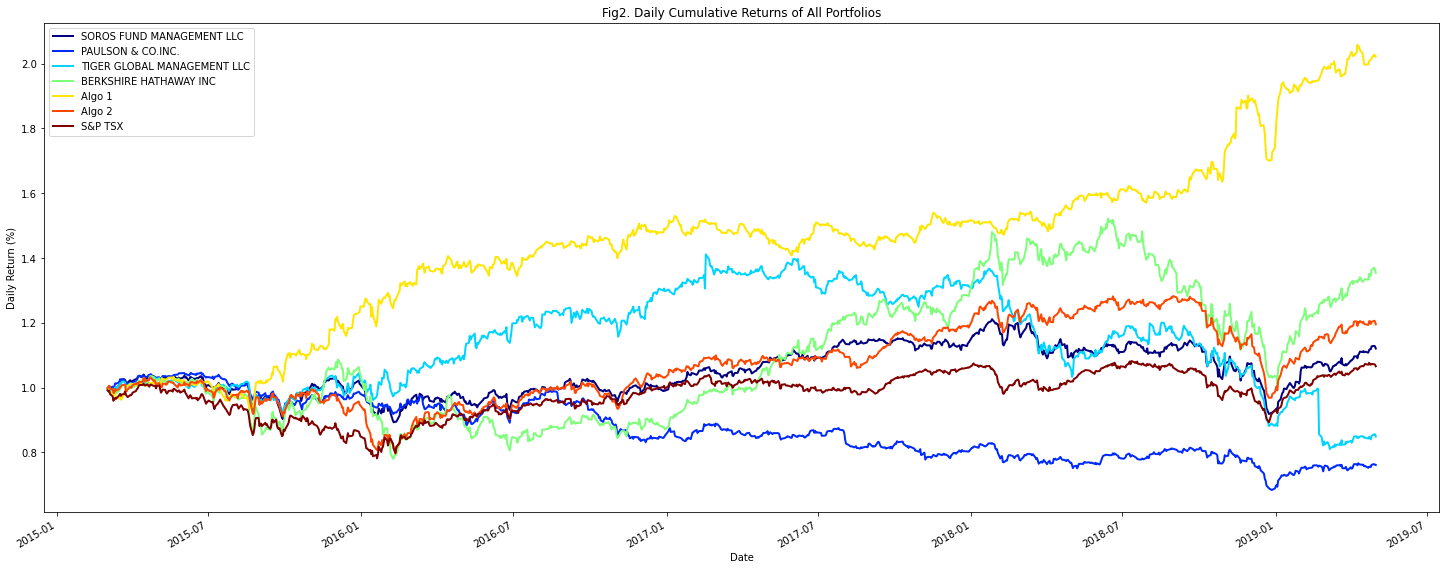

In [12]:
# Calculate and plot cumulative returns for all portfolios. Does any portfolio outperform the S&P TSX 60?
df_cum = (1+ daily_returns).cumprod()
df_cum.plot(lw=2,figsize=(25,10), colormap="jet", markersize=10, title="Fig2. Daily Cumulative Returns of All Portfolios", ylabel="Daily Return (%)", xlabel="Date")

In [13]:
#Does any portfolio outperform the S&P TSX 60?
print("Based on the above graph (Fig2.) there were two strategies which outperformand the S&P returns for the given period. These two strategies were 'Algo 1' and 'Berkshire Hathaway Inc'. However, the Author would also highlight there were stages within this timeframe where other strategies were more effective at producing excess alpha.")

Based on the above graph (Fig2.) there were two strategies which outperformand the S&P returns for the given period. These two strategies were 'Algo 1' and 'Berkshire Hathaway Inc'. However, the Author would also highlight there were stages within this timeframe where other strategies were more effective at producing excess alpha.


In [14]:
# Risk Analysis

<AxesSubplot:title={'center':'Fig3. Daily Returns Box Plot'}, ylabel='% Change'>

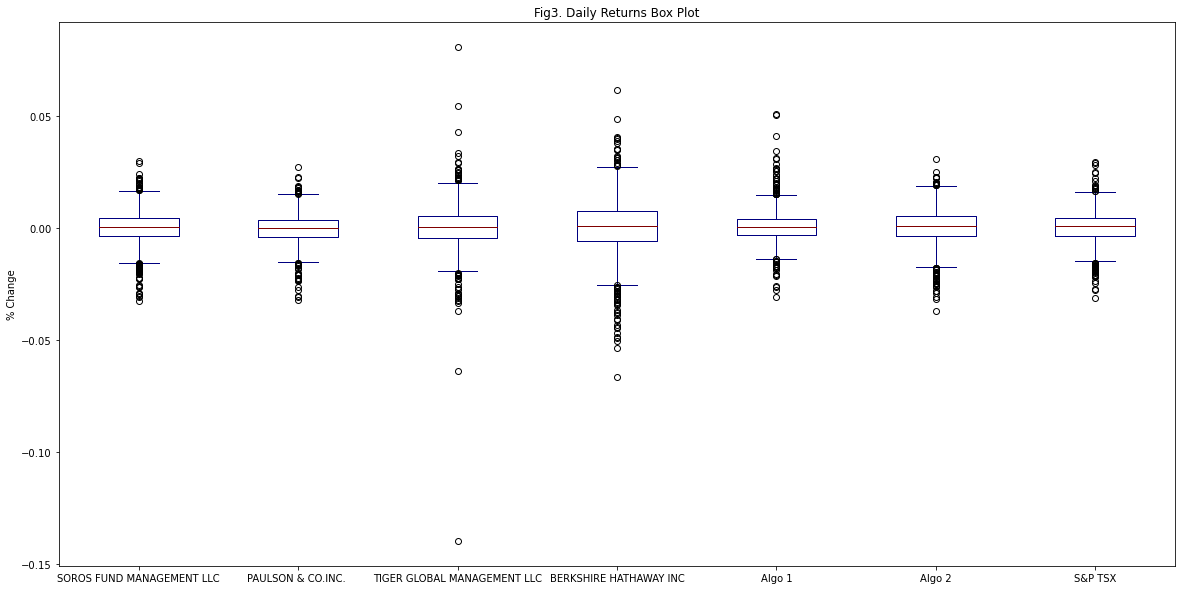

In [15]:
# Create a box plot for each of the returns.
daily_returns.plot(kind = "box", colormap="jet", figsize = (20,10), ylabel="% Change", title="Fig3. Daily Returns Box Plot")

In [16]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio.
df_daily_std = pd.DataFrame(daily_returns.std()).rename(columns = {0:"std"})
df_daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
S&P TSX,0.007034


In [17]:
#Which portfolios are riskier than the S&P TSX 60?
higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["S&P TSX", "std"]]
print(f"Using the assumption that having a greater standard deviation (volatility) than the 'S&P TSX' means the stratigy is 'riskier'. Therefor, the following strategies are considered 'risky': {higher_std}")

Using the assumption that having a greater standard deviation (volatility) than the 'S&P TSX' means the stratigy is 'riskier'. Therefor, the following strategies are considered 'risky':                                   std
SOROS FUND MANAGEMENT LLC    0.007828
TIGER GLOBAL MANAGEMENT LLC  0.010883
BERKSHIRE HATHAWAY INC       0.012826
Algo 1                       0.007589
Algo 2                       0.008326


In [18]:
# Calculate the annualized standard deviation 
df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
S&P TSX,0.111664


<AxesSubplot:title={'center':'Fig4. Daily Returns Box Plot'}, xlabel='Date'>

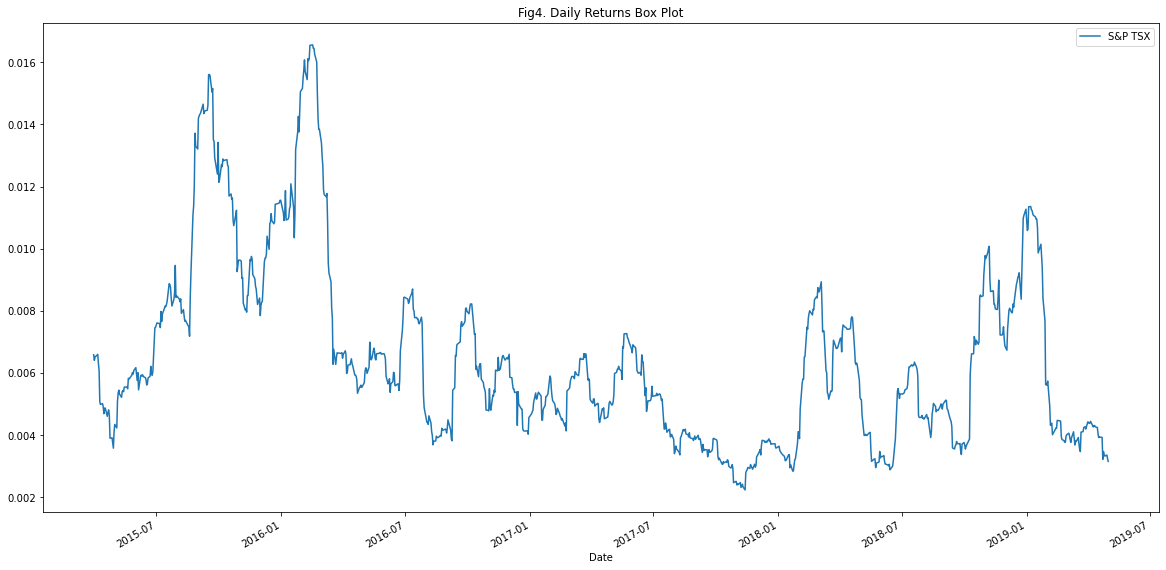

In [19]:
#Rolling Statistics
#Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
sp_rolling_21 = daily_returns[["S&P TSX"]].rolling(window = 21).std()
sp_rolling_21.plot(figsize = (20,10), title="Fig4. Daily Returns Box Plot")

In [20]:
# Calculate and plot the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
correlation_sp = pd.DataFrame(daily_returns.corr()).loc[:,"S&P TSX"]
mimick_strat = correlation_sp[correlation_sp==correlation_sp[correlation_sp<1].max()]


In [21]:
#determine which strategie may mimick the S&P TSX 60
print("Based on the above calculations the strategy which will potentially mimick the S&P TSX 60 is Algo 2")

Based on the above calculations the strategy which will potentially mimick the S&P TSX 60 is Algo 2


<AxesSubplot:title={'center':'Fig5. Algo 2 vs S&P TSX 60'}, xlabel='S&P TSX', ylabel='Algo 2'>

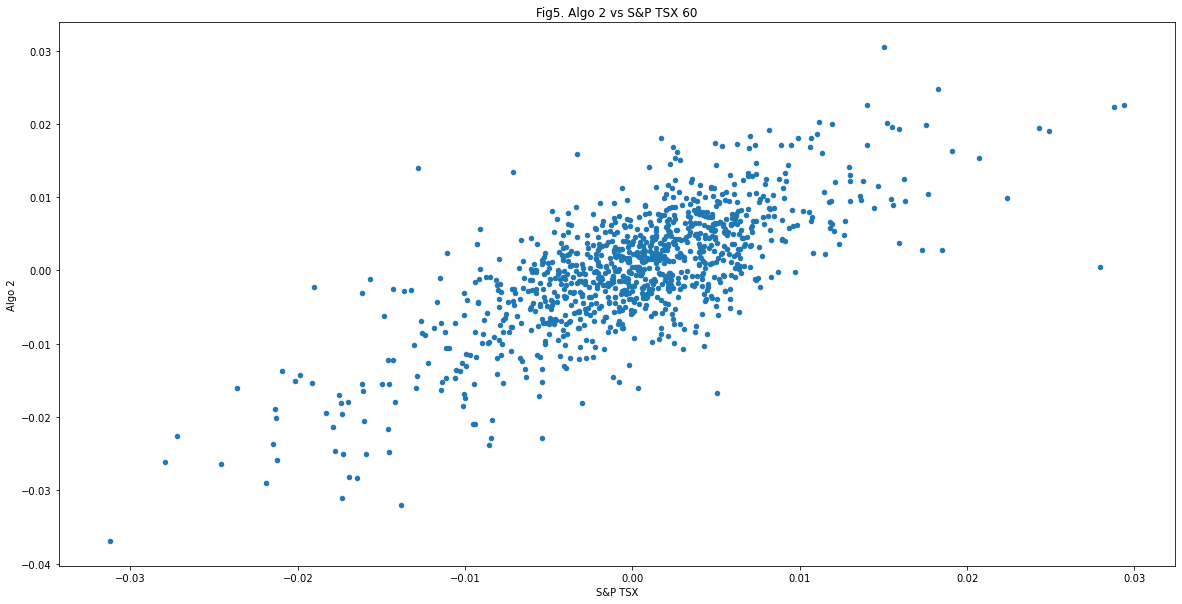

In [22]:
daily_returns.plot(kind="scatter", y = "Algo 2", x = "S&P TSX", figsize = (20,10), title="Fig5. Algo 2 vs S&P TSX 60")

<AxesSubplot:title={'center':'Fig6. Rolling 60-Day Beta of Tiger Global'}, xlabel='Date'>

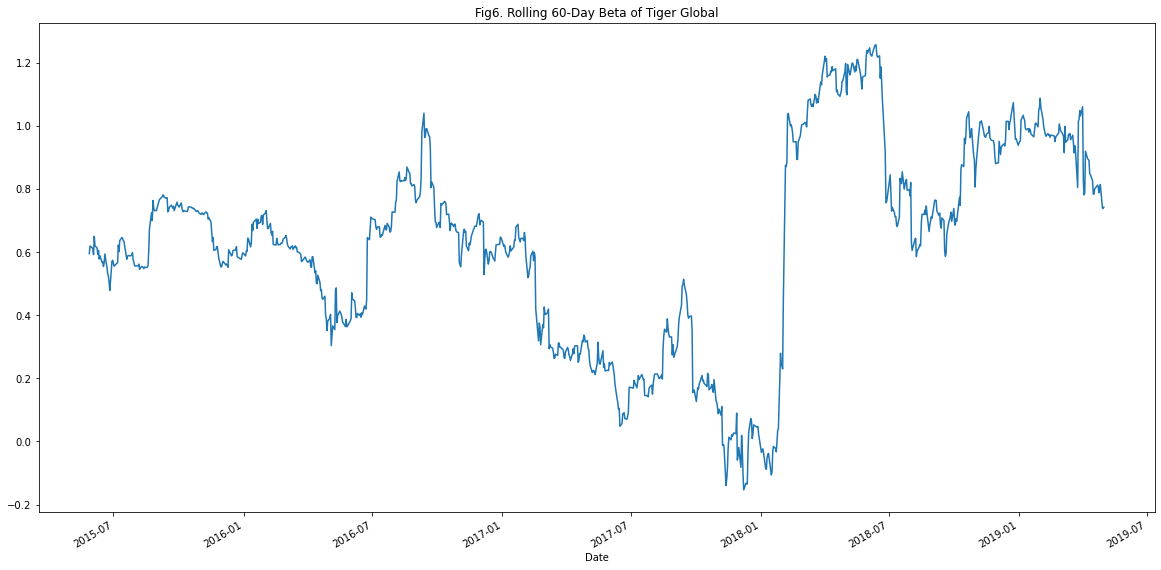

In [23]:
#Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60
rolling_covariance = daily_returns["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(daily_returns["S&P TSX"])
rolling_variance = daily_returns["S&P TSX"].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Fig6. Rolling 60-Day Beta of Tiger Global')

In [24]:
# Sharpe Ratios

In [25]:
# Calculate Sharpe Ratios
sharpe_ratios = daily_returns.mean()*252/(daily_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Fig7. Sharpe Ratios'}>

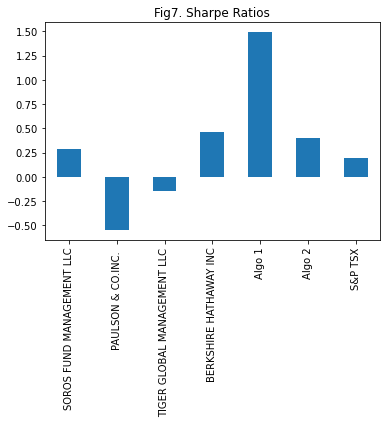

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Fig7. Sharpe Ratios")

In [27]:
# Setermine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.
print("Algo 1 outperformed market and whales' strategies while algo 2 fell below market expectations. However, it is arguable even after risk adjusted returns neither of the Algos have attractive performance")

Algo 1 outperformed market and whales' strategies while algo 2 fell below market expectations. However, it is arguable even after risk adjusted returns neither of the Algos have attractive performance


In [28]:
#Create a Custom Portfolio

In [43]:
#Download the data as CSV files and calculate the portfolio returns.
csvpath_otex = ("resource/otex_historical.csv")
otex_returns_csv = pd.read_csv(csvpath_otex, index_col="Date", infer_datetime_format=True, parse_dates=True).dropna()
otex_returns_csv.rename(columns = {"Close":"OTEX"}, inplace = True)
otex_returns_csv.drop(["Symbol"], axis=1, inplace=True)
otex_returns_csv.sample(1)

,OTEX
Date,
2019-10-18,51.6


In [44]:
csvpath_l = ("resourc/l_historical.csv")
l_returns_csv = pd.read_csv(csvpath_l, index_col="Date", infer_datetime_format=True, parse_dates=True).dropna()
l_returns_csv.rename(columns = {"Close":"L"}, inplace = True)
l_returns_csv.drop(["Symbol"], axis=1, inplace=True)
l_returns_csv.sample(1)

,L
Date,
2018-01-30,56.67


In [45]:
csvpath_shop = ("resource/shop_historical.csv")
shop_returns_csv = pd.read_csv(csvpath_shop, index_col="Date", infer_datetime_format=True, parse_dates=True).dropna()
shop_returns_csv.rename(columns = {"Close":"SHOP"}, inplace = True)
shop_returns_csv.drop(["Symbol"], axis=1, inplace=True)
shop_returns_csv.sample(1)

,SHOP
Date,
2018-04-18,161.12


In [48]:
# Merge all the data frames together
# compile the list of dataframes you want to merge
data_frames_custom = [otex_returns_csv, l_returns_csv, shop_returns_csv]
df_custom = reduce(lambda  left,right: pd.merge(left,right,on=["Date"],
                                            how='inner'), data_frames_custom)
df_custom.head()

,OTEX,L,SHOP
Date,,,
2018-01-02,43.58,57.99,132.06
2018-01-03,43.07,57.41,135.15
2018-01-04,42.91,57.42,137.46
2018-01-05,42.57,57.42,137.26
2018-01-08,42.16,56.86,139.51


In [49]:
# Reset the index
df_custom.index =df_custom.index.normalize()

In [50]:
# Drop Nulls
df_custom.dropna(inplace=True)

In [51]:
# Calculate the weighted returns for your portfolio, assuming equal number of shares per stock
weights = [1/3, 1/3, 1/3]
my_portfolio = df_custom.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns.head()

Date
2018-01-03    0.008561
2018-01-04    0.009167
2018-01-05   -0.002271
2018-01-08    0.005395
2018-01-09   -0.004570
dtype: float64

In [99]:
# Add your portfolio returns to the DataFrame with the other portfolios
df_portfolio = pd.concat((my_portfolio_returns,daily_returns), axis = 1, join = "inner")
df_portfolio.rename(columns = {0:"rhoan strategy"}, inplace = True)
df_portfolio

,rhoan strategy,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2018-01-03,0.008561,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.009167,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.002271,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.005395,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.004570,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000388,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008558,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.009159,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [100]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df_portfolio.dropna(inplace=True)

In [101]:
# Calculate the Annualized Standard Deviation.
portfolio_std = pd.DataFrame(df_portfolio.std()).rename(columns = {0:"std"})
portfolio_std

,std
rhoan strategy,0.021782
SOROS FUND MANAGEMENT LLC,0.009177
PAULSON & CO.INC.,0.007203
TIGER GLOBAL MANAGEMENT LLC,0.013848
BERKSHIRE HATHAWAY INC,0.014328
Algo 1,0.007561
Algo 2,0.008672
S&P TSX,0.006244


In [102]:
higher_std = portfolio_std[portfolio_std["std"] > portfolio_std.loc["S&P TSX", "std"]]
higher_std

,std
rhoan strategy,0.021782
SOROS FUND MANAGEMENT LLC,0.009177
PAULSON & CO.INC.,0.007203
TIGER GLOBAL MANAGEMENT LLC,0.013848
BERKSHIRE HATHAWAY INC,0.014328
Algo 1,0.007561
Algo 2,0.008672


In [103]:
#analyse finding
print("All portfolios are riskier than the S&P TSX 60")


All portfolios are riskier than the S&P TSX 60


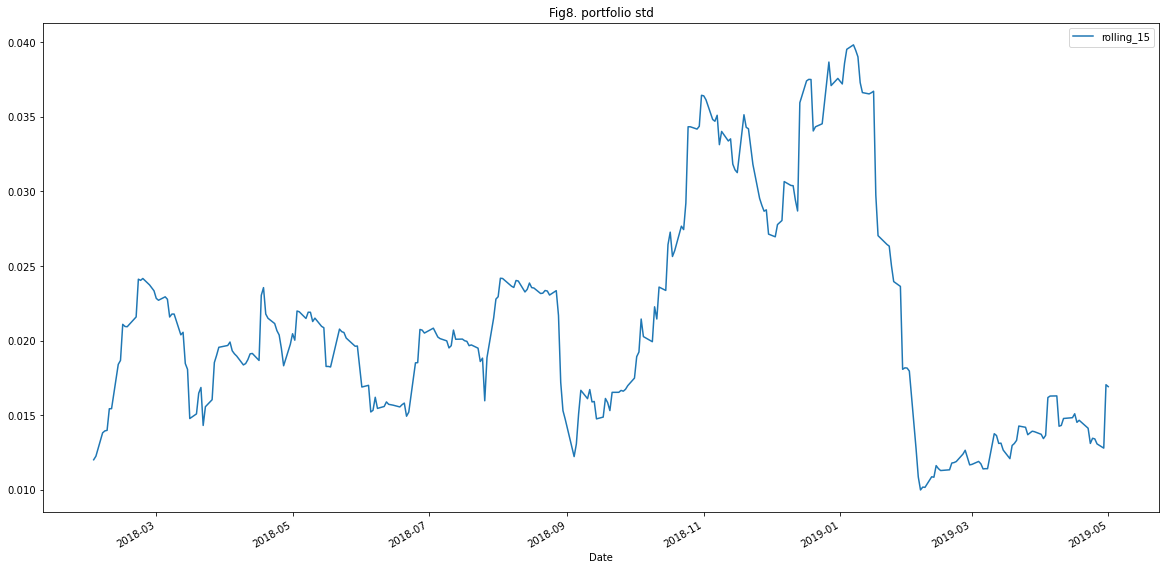

In [104]:
# Calculate and plot rolling std with a 21-day window
my_portfolio_rolling_21 = df_portfolio[["rhoan strategy"]].rolling(window = 21).std()
ax = my_portfolio_rolling_21.plot(figsize = (20,10), title = 'Fig8. portfolio std')
ax.legend(['rolling_15','rolling_60','rolling_120'])

<AxesSubplot:title={'center':'Fig9. Rolling 60-Day Beta of my portfolio'}, xlabel='Date'>

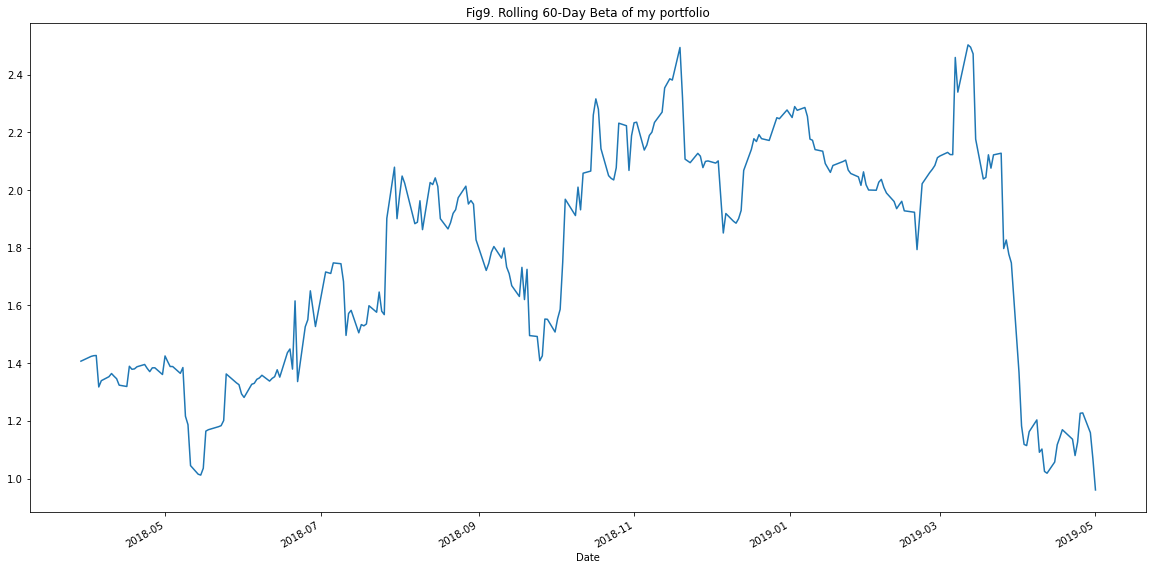

In [105]:
# Calculate and plot the 60-day rolling beta for your portfolio compared to the S&P 60 TSX.
rolling_covariance = df_portfolio["rhoan strategy"].rolling(window=60).cov(df_portfolio["S&P TSX"])
rolling_variance = df_portfolio["S&P TSX"].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Fig9. Rolling 60-Day Beta of my portfolio')

In [106]:
# Calculate the Sharpe ratios and generate a bar plot.
# Annualzied Sharpe Ratios
trading_days = df_portfolio.count()
sharpe_ratios = df_portfolio.mean()*trading_days/(df_portfolio.std()*np.sqrt(trading_days))

<AxesSubplot:title={'center':'Fig10. sharpe ratios'}>

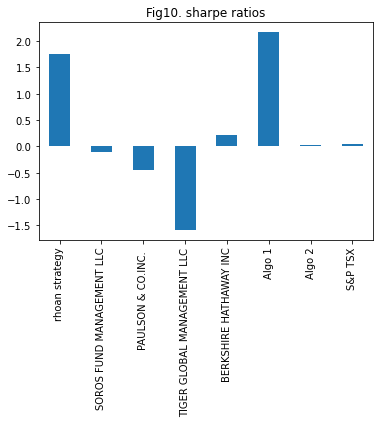

In [107]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "Fig10. sharpe ratios")

In [108]:
# How does your portfolio do?
print("The new portfolio performs simalarly to Algo 1. It would recommend to further diversify the stock composition as the 'rhoan strategy' is only comprised of 3 stocks which will cause high volatilty")

The new portfolio performs simalarly to Algo 1. It would recommend to further diversify the stock composition as the 'rhoan strategy' is only comprised of 3 stocks which will cause high volatilty
